In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('Data.csv')


# Replace NA values with 0
df.fillna(0, inplace=True)

# Replace infinite values with 0
df.replace([np.inf, -np.inf], 0, inplace=True)

# Check for NaN or infinite values




rows_to_remove = ["Total State (S)", "Total UT (S)", "Total All India"]
df_cleaned = df[~df['State/UT'].isin(rows_to_remove)]

# Reset index after removing rows (optional)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.to_csv('Data_Updated.csv', index=False)

In [3]:
df = pd.read_csv('Data_Updated.csv')


# Select features (population and crime counts for years 2015 to 2021)
features = df[['Population(2015)', 'Rate(2015)', 'Population(2016)', 'Rate(2016)',
               'Population(2017)', 'Rate(2017)', 'Population(2018)', 'Rate(2018)',
               'Population(2019)', 'Rate(2019)', 'Population(2020)', 'Rate(2020)',
               'Population(2021)', 'Rate(2021)', '2015', '2016',
               '2017', '2018', '2019', '2020', '2021']]

# Select target variable (crime counts for 2022)
target = df['2022']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


Initial Model: Linear Regression
Mean Squared Error: 7745272386.884303
R^2 Score: 0.846655485616977



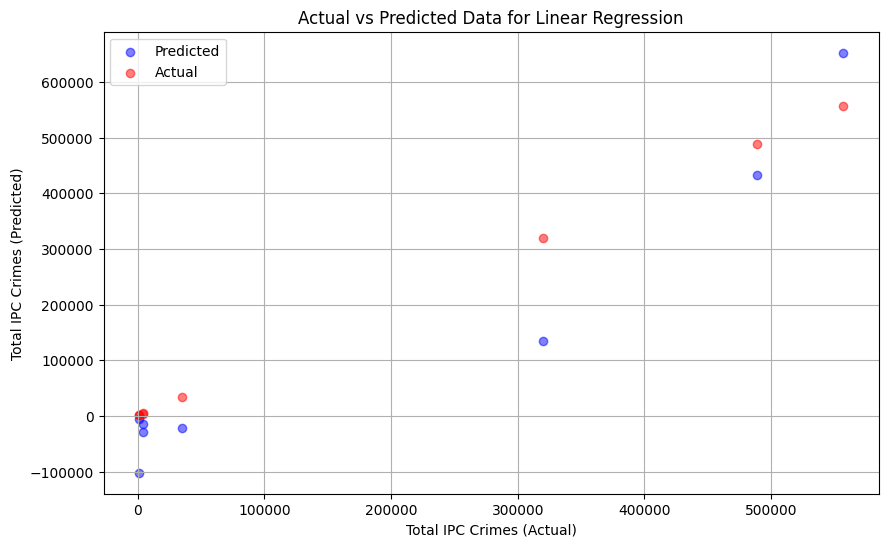

Initial Model: Random Forest Regressor
Mean Squared Error: 2887302658.6940637
R^2 Score: 0.9428358355964342



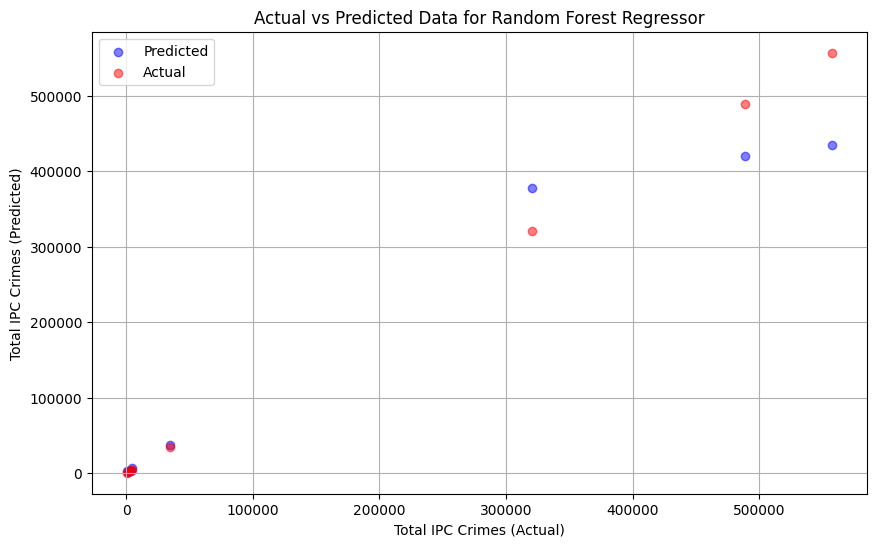

Initial Model: XGBoost Regressor
Mean Squared Error: 2039067544.1253204
R^2 Score: 0.9596295952796936



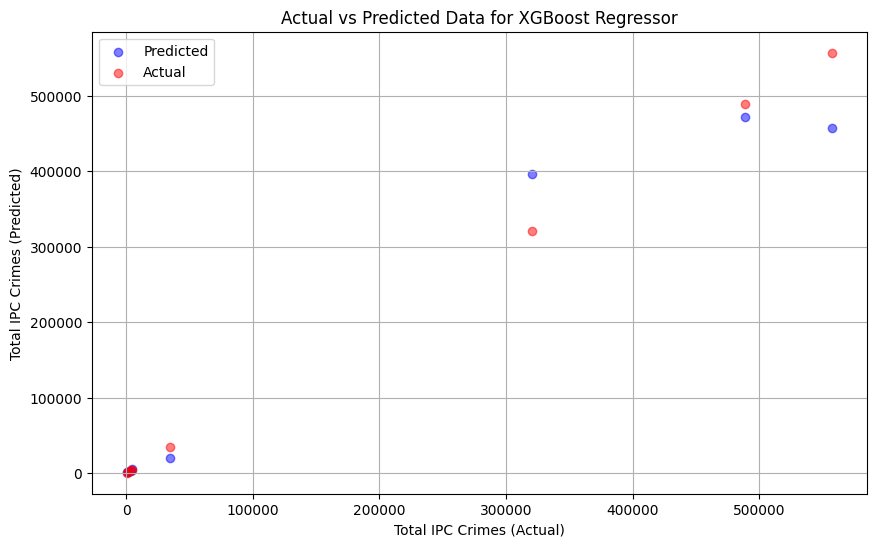

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Normalize the target variable
scaler_target = MinMaxScaler()
y_train_normalized = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler_target.transform(y_test.values.reshape(-1, 1))

# Scale features for models that require scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


r2_scores = {}

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBoost Regressor': XGBRegressor(objective='reg:squarederror')
}

# Train and evaluate models
for name, model in models.items():
    # For XGBoost, we use the unscaled features as it handles scaling internally
    if name == 'XGBoost Regressor':
        model.fit(X_train, y_train_normalized.ravel())  # Use ravel() to flatten the array
        y_pred_normalized = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train_normalized.ravel())  # Use ravel() to flatten the array
        y_pred_normalized = model.predict(X_test_scaled)

    # Inverse transform the predictions to original scale
    y_pred = scaler_target.inverse_transform(y_pred_normalized.reshape(-1, 1))

    # Evaluate the model using the original target values
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    r2_scores[name] = r2

    print(f'Initial Model: {name}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}\n')

    # Visualization of Actual vs Predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.5)  # Predicted data points
    plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5)  # Actual data points

    # Set labels and title
    plt.xlabel('Total IPC Crimes (Actual)')
    plt.ylabel('Total IPC Crimes (Predicted)')
    plt.title(f'Actual vs Predicted Data for {name}')
    plt.legend()
    plt.grid()
    plt.show()

In [8]:
from keras.models import Sequential
from keras.layers import Dense

# Define MLP model
mlp_model = Sequential()
mlp_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
mlp_model.add(Dense(64, activation='relu'))  # Hidden layer
mlp_model.add(Dense(1, activation='linear'))  # Output layer

# Compile the model
mlp_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the MLP model
mlp_predictions = mlp_model.predict(X_test)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_r2 = r2_score(y_test, mlp_predictions)




Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 27174582272.0000 - val_loss: 209037082624.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 22956744704.0000 - val_loss: 234835492864.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 19210696704.0000 - val_loss: 269412909056.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 15835942912.0000 - val_loss: 312418336768.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 12938489856.0000 - val_loss: 361739616256.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 10460775424.0000 - val_loss: 414482268160.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 8411911168.0000 - val_loss: 471890526208.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 6735104000.0000 - val_loss: 528044294144.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 5433024512.0000 - val_loss: 581296521216.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 4457611264

In [9]:
print('MLP Model Evaluation:')
print(f'Mean Squared Error: {mlp_mse}')
print(f'R² Score: {mlp_r2}\n')


MLP Model Evaluation:
Mean Squared Error: 500882947.3845246
R² Score: 0.9900832772254944



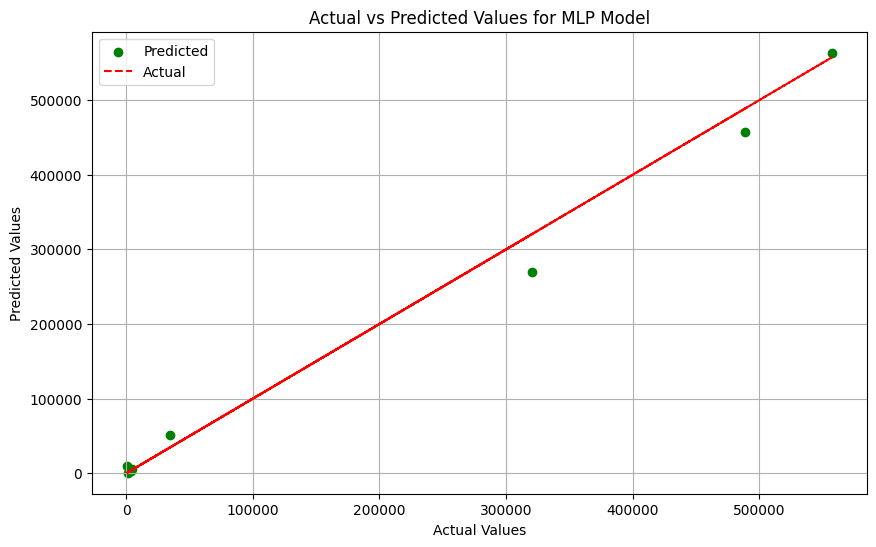

In [10]:
import matplotlib.pyplot as plt

# Flatten the MLP predictions to match the shape
mlp_predictions_flat = mlp_predictions.flatten()

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, mlp_predictions_flat, color='green', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for MLP Model')
plt.legend()
plt.grid()
plt.show()


In [11]:
# Convert DataFrame to NumPy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape data for RNN (samples, time steps, features)
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

# Continue with the model as before
rnn_model = Sequential()
rnn_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
rnn_model.add(Dropout(0.2))
rnn_model.add(LSTM(50, activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1))  # Output layer

# Compile and fit the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train_reshaped, y_train, epochs=200, batch_size=32)

# Evaluate the model
y_pred_rnn = rnn_model.predict(X_test_reshaped)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

print(f'RNN Model: Mean Squared Error: {mse_rnn}, R^2 Score: {r2_rnn}')


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 63385792512.0000
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 62019428352.0000
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 62026665984.0000
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 63771926528.0000
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 61916897280.0000
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 61749293056.0000
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 61570973696.0000
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 62093533184.0000
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 59871924224.0000
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 59272159232.0000
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 59609653248.0000
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 59423821824.0000
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 60044890112.0000
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━

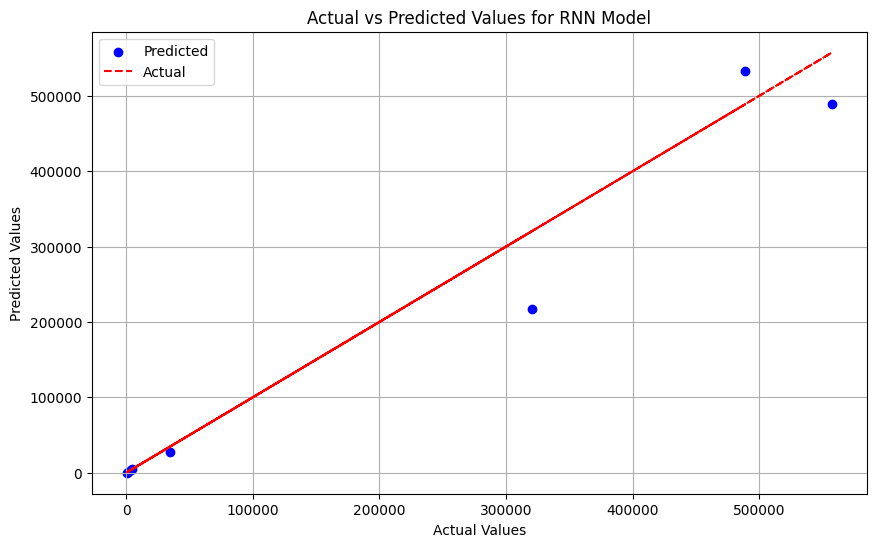

In [12]:
import matplotlib.pyplot as plt

# Flatten the predictions to match the shape
y_pred_rnn_flat = y_pred_rnn.flatten()

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rnn_flat, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for RNN Model')
plt.legend()
plt.grid()
plt.show()


In [13]:
from keras.models import Sequential
from keras.layers import Dense

# Build the FNN model
fnn_model = Sequential()
fnn_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
fnn_model.add(Dense(32, activation='relu'))
fnn_model.add(Dense(1))  # Output layer

# Compile the model
fnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
fnn_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
y_pred_fnn = fnn_model.predict(X_test)
mse_fnn = mean_squared_error(y_test, y_pred_fnn)
r2_fnn = r2_score(y_test, y_pred_fnn)

print(f'FNN Model: Mean Squared Error: {mse_fnn}, R^2 Score: {r2_fnn}')



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 85383389184.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 76780724224.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 70899875840.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 66305875968.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 61596798976.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 56539701248.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 51374419968.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 46391726080.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 41786503168.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 37564207104.0000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 33738999808.0000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 30218653696.0000
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 26921250816.0000
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━

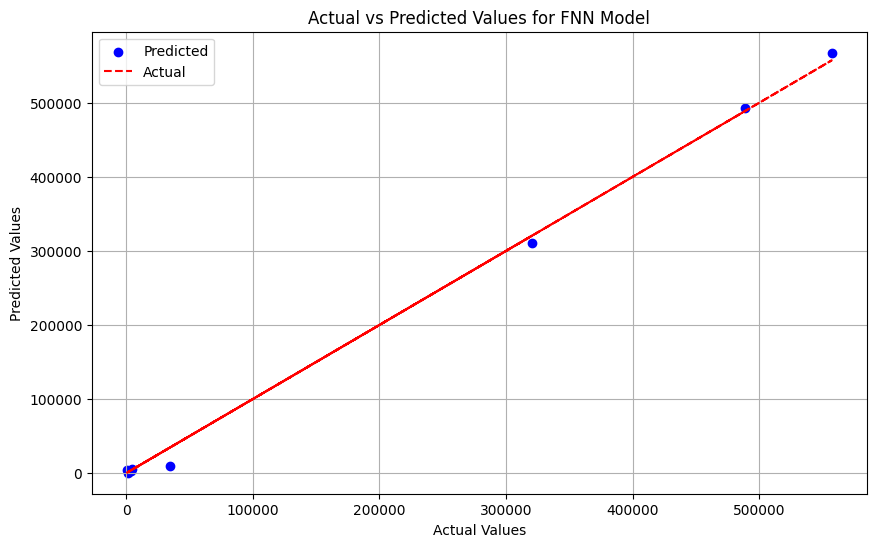

In [14]:
import matplotlib.pyplot as plt

# Flatten the predictions to match the shape
y_pred_fnn_flat = y_pred_fnn.flatten()

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_fnn_flat, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for FNN Model')
plt.legend()
plt.grid()
plt.show()

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('Data_Updated.csv')

# Assuming your dataset has columns like 'Population(2015)', 'Rate(2015)', ..., 'Population(2021)', 'Rate(2021)'
# and you want to predict 'Crimes(2022)'

# Define features as years' crime data, population, and rate
features = data[['2015', '2016', '2017', '2018', '2019', '2020', '2021',
                 'Population(2015)', 'Population(2016)', 'Population(2017)',
                 'Population(2018)', 'Population(2019)', 'Population(2020)',
                 'Population(2021)', 'Rate(2015)', 'Rate(2016)', 'Rate(2017)',
                 'Rate(2018)', 'Rate(2019)', 'Rate(2020)', 'Rate(2021)']]

# Target: Crimes in 2022
target = data['2022']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Normalize the target variable
scaler_target = MinMaxScaler()
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))

# Reshape data to fit LSTM input (samples, time steps, features)
n_time_steps = 1  # Using previous years' data as time steps
n_features = X_train.shape[1]

X_train_lstm = X_train.reshape((X_train.shape[0], n_time_steps, n_features))
X_test_lstm = X_test.reshape((X_test.shape[0], n_time_steps, n_features))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_time_steps, n_features)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, activation='relu', return_sequences=False))  # Second LSTM layer
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

# Train the LSTM model
history = lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_test_lstm, y_test), callbacks=[early_stopping])

# Predict
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Inverse transform the predictions
y_pred_lstm = scaler_target.inverse_transform(y_pred_lstm)

# Evaluate the model
mse_lstm = mean_squared_error(scaler_target.inverse_transform(y_test), y_pred_lstm)
r2_lstm = r2_score(scaler_target.inverse_transform(y_test), y_pred_lstm)

print(f'LSTM Model: Mean Squared Error: {mse_lstm}, R^2 Score: {r2_lstm}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.1153 - val_loss: 0.1402
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1111 - val_loss: 0.1352
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1061 - val_loss: 0.1303
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.1051 - val_loss: 0.1258
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1013 - val_loss: 0.1215
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0986 - val_loss: 0.1174
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0961 - val_loss: 0.1134
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0902 - val_loss: 0.1093
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0892 - val_loss: 0.1053
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0843 - val_loss: 0.1012
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.0811 - val_loss: 0.0972
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0819 - val_loss: 0.0930

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
LSTM Model: Mean Squared Error: 14096048888.559032, R^2 Score: 0.7209198510312217


[I 2024-09-30 08:49:43,075] A new study created in memory with name: no-name-b55461af-5928-4c36-8223-79113cf79685
<ipython-input-4-e6198e5163b5>:56: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
<ipython-input-4-e6198e5163b5>:57: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
<ipython-input-4-e6198e5163b5>:58: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l1_strength = trial.suggest_loguniform('l1_st

Best hyperparameters: {'learning_rate': 0.006524922881112669, 'dropout_rate': 0.15337337386210967, 'l1_strength': 2.0275665107232976e-05, 'l2_strength': 3.23191688149783e-05}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
CNN-LSTM Model: Mean Squared Error: 4617528469.556218, R^2 Score: 0.9085800181781962


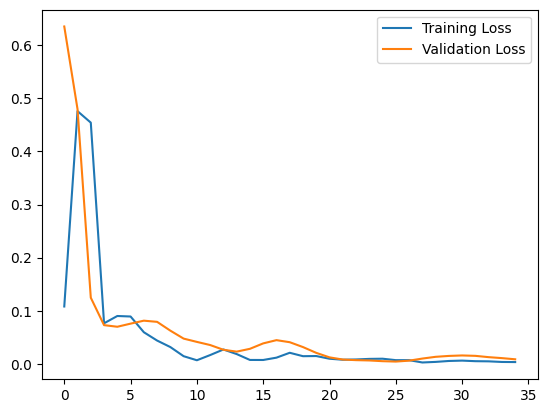

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import optuna

 # Optuna for hyperparameter tuning

# Load preprocessed data from the dataframe
features = df[['Population(2015)', 'Rate(2015)', 'Population(2016)', 'Rate(2016)', 'Population(2017)', 'Rate(2017)',
               'Population(2018)', 'Rate(2018)', 'Population(2019)', 'Rate(2019)', 'Population(2020)', 'Rate(2020)',
               'Population(2021)', 'Rate(2021)', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]
target = df['2022']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalize the feature values using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to NumPy arrays for model compatibility
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Normalize the target values (output) using MinMaxScaler
scaler_target = MinMaxScaler()
y_train = scaler_target.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_target.transform(y_test.reshape(-1, 1))

# Determine the number of time steps and features per time step
n_features = X_train.shape[1]
for n_time_steps in range(1, n_features + 1):
    if n_features % n_time_steps == 0:
        break
n_features_per_time_step = n_features // n_time_steps

# Reshape the input data for CNN-LSTM model compatibility
X_train_cnn_lstm = X_train.reshape((X_train.shape[0], n_time_steps, n_features_per_time_step, 1))
X_test_cnn_lstm = X_test.reshape((X_test.shape[0], n_time_steps, n_features_per_time_step, 1))

# Define the function for hyperparameter optimization using Optuna
def optimize_hyperparameters(trial):
    # Sample hyperparameters from defined ranges
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
    l1_strength = trial.suggest_loguniform('l1_strength', 1e-5, 1e-1)
    l2_strength = trial.suggest_loguniform('l2_strength', 1e-5, 1e-1)

    # Build the CNN-LSTM model
    model = Sequential()
    model.add(TimeDistributed(Conv1D(256, kernel_size=3, activation='swish', kernel_regularizer=l1_l2(l1=l1_strength, l2=l2_strength)),
                              input_shape=(n_time_steps, n_features_per_time_step, 1)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(Bidirectional(LSTM(200, activation='relu', return_sequences=False)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer

    # Compile the model with the Adam optimizer and MSE loss function
    optimizer = Adam(learning_rate=learning_rate)  # Updated this line
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(patience=10, min_delta=0.001)

    # Train the model with validation data and early stopping
    history = model.fit(X_train_cnn_lstm, y_train, epochs=100, batch_size=64, validation_data=(X_test_cnn_lstm, y_test), callbacks=[early_stopping], verbose=0)

    # Return the final validation loss for hyperparameter evaluation
    return history.history['val_loss'][-1]

# Perform hyperparameter tuning with Optuna (100 trials)
study = optuna.create_study(direction='minimize')
study.optimize(optimize_hyperparameters, n_trials=100)

# Retrieve the best hyperparameters from Optuna's study
best_params = study.best_params
print('Best hyperparameters:', best_params)

# Create the CNN-LSTM model using the best hyperparameters
model = Sequential()
model.add(TimeDistributed(Conv1D(256, kernel_size=3, activation='swish', kernel_regularizer=l1_l2(l1=best_params['l1_strength'], l2=best_params['l2_strength'])),
                          input_shape=(n_time_steps, n_features_per_time_step, 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM(200, activation='relu', return_sequences=False)))
model.add(Dropout(best_params['dropout_rate']))
model.add(Dense(1))  # Output layer

# Compile the model with the best learning rate and MSE loss
optimizer = Adam(learning_rate=best_params['learning_rate'])  # Updated this line
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define learning rate scheduler to dynamically adjust learning rate during training
def learning_rate_scheduler(epoch):
    if epoch < 50:
        return best_params['learning_rate']
    elif epoch < 100:
        return best_params['learning_rate'] / 2
    else:
        return best_params['learning_rate'] / 10

lr_scheduler = LearningRateScheduler(learning_rate_scheduler)

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, min_delta=0.001)

# Train the model with the learning rate scheduler and early stopping
history = model.fit(X_train_cnn_lstm, y_train, epochs=100, batch_size=64, validation_data=(X_test_cnn_lstm, y_test), callbacks=[lr_scheduler, early_stopping], verbose=0)

# Make predictions on the test set
y_pred_cnn_lstm = model.predict(X_test_cnn_lstm)

# Inverse transform the predicted values to match the original scale
y_pred_cnn_lstm = scaler_target.inverse_transform(y_pred_cnn_lstm)

# Evaluate the model's performance using Mean Squared Error and R² score
mse_cnn_lstm = mean_squared_error(scaler_target.inverse_transform(y_test), y_pred_cnn_lstm)
r2_cnn_lstm = r2_score(scaler_target.inverse_transform(y_test), y_pred_cnn_lstm)
print(f'CNN-LSTM Model: Mean Squared Error: {mse_cnn_lstm}, R^2 Score: {r2_cnn_lstm}')

# Plot training and validation loss curves to assess the model's learning process
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


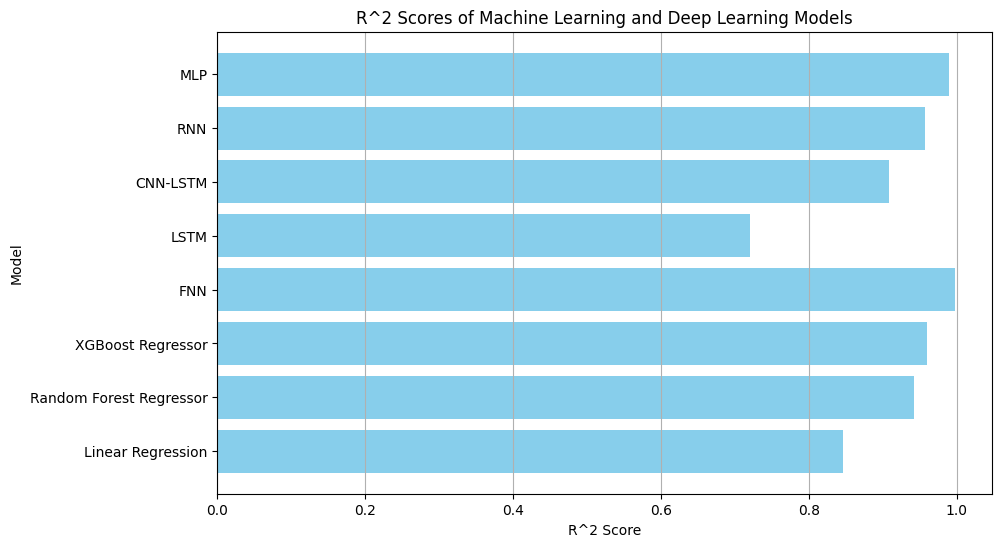

In [16]:
r2_scores['FNN'] = r2_fnn
r2_scores['LSTM'] = r2_lstm
r2_scores['CNN-LSTM'] = r2_cnn_lstm
r2_scores['RNN'] = r2_rnn
r2_scores['MLP'] = mlp_r2


# Plot the R^2 scores for both ML and DL models
plt.figure(figsize=(10, 6))

# Convert dictionary keys and values to lists for plotting
model_names = list(r2_scores.keys())
r2_values = list(r2_scores.values())

# Create a horizontal bar plot
plt.barh(model_names, r2_values, color='skyblue')

# Add labels and title
plt.xlabel('R^2 Score')
plt.ylabel('Model')
plt.title('R^2 Scores of Machine Learning and Deep Learning Models')
plt.grid(axis='x')

# Display the plot
plt.show()